In [1]:
import pandas as pd

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('klasterovanje.csv')
df.head()

,a,b
0,-6.474178,-6.030731
1,7.348183,-2.775302
2,4.860236,6.628770
3,-6.506293,-6.162907
4,-3.562805,7.264862


In [3]:
df.describe(include='all')

,a,b
count,800.000000,800.000000
mean,1.344177,0.344285
std,5.255670,5.521842
min,-7.647969,-9.810303
25%,-3.376759,-4.600700
50%,0.016030,0.695802
75%,6.517812,5.735028
max,10.506171,10.701262


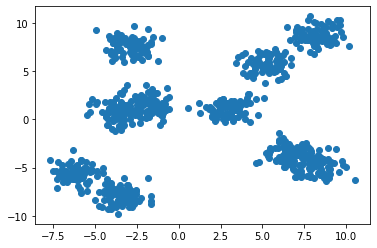

In [8]:
# nije potrebno skaliranje, podaci su vec otprilike na istoj skali
plt.scatter(df['a'], df['b'])

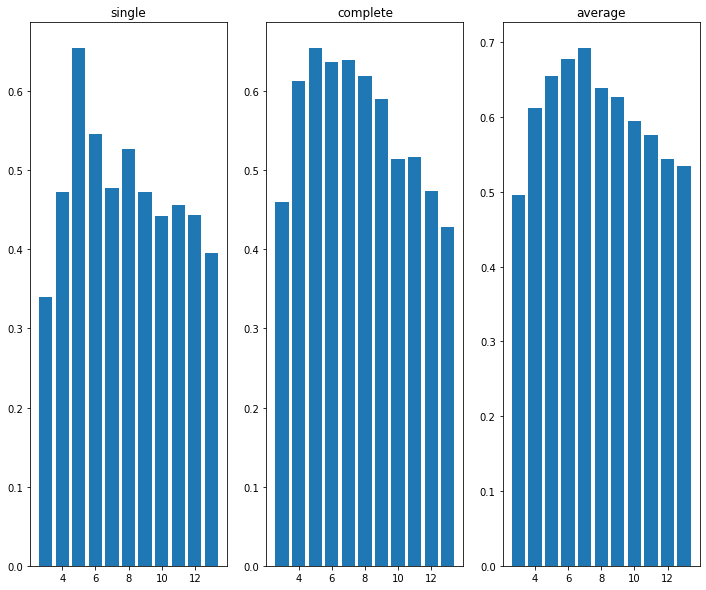

best params: 
	max silhouette: 0.6919137253033582
	linkage: average 
	clusters: 7


In [5]:
num_of_clusters = range(3, 14)
linkages = ['single', 'complete', 'average']

max_n = -1
max_linkage = None
max_silhouette = -1

fig = plt.figure(figsize=(12, 10))

for i, linkage in enumerate(linkages):
    silohuettes = []
    
    for n in num_of_clusters:
        model = AgglomerativeClustering(n_clusters=n, linkage=linkage)
        model.fit(df)
        silhouette = silhouette_score(df, model.labels_)
        silohuettes.append(silhouette)
        if silhouette > max_silhouette:
            max_silhouette = silhouette
            max_linkage = linkage
            max_n = n
        
    plt.subplot(1, 3, i + 1)
    plt.title(linkage)
    plt.bar(num_of_clusters, silohuettes)

plt.show()

print(f"best params: \n\tmax silhouette: {max_silhouette}\n\tlinkage: {max_linkage} \n\tclusters: {max_n}" )

In [6]:
best_model = AgglomerativeClustering(n_clusters=max_n, linkage=max_linkage)
model.fit(df)
df['label'] = model.labels_

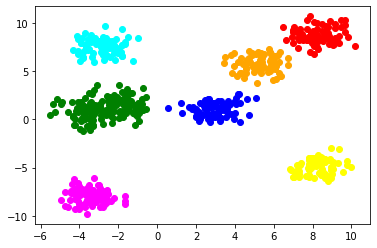

In [7]:
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'orange', 'black']

for n in range(max_n):
    isntances = df[df['label'] == n]
    plt.scatter(isntances['a'], isntances['b'], color=colors[n])

# NOTE: kada se ova slika uporedi sa onom sto se dobije na pocetku zadatka izgleda kao da fali jedan
# klaster, nisam nasao zasto